# Análisis Exploratorio de Datos de los Pingüinos de Palmer

![Pingüinos de Palmer](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

## Los datos provienen de:

[Pingüinos de Palmer](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv)

## Acerca de los datos

Los datos fueron recopilados y puestos a disposición por la Dra. Kristen Gorman y la Estación Palmer, LTER de la Antártida, un miembro de la Red de Investigación Ecológica a Largo Plazo.

## Atributos:

- **especie**: la especie de pingüino (Adelie, Barbijo o Papúa)

- **isla**: isla en la Antártida donde se observó cada pingüino (Biscoe, Torgersen o Dream)

- **longitud_pico_mm**: medida de la longitud del pico en milímetros

- **profundidad_pico_mm**: medida de la profundidad del pico en milímetros

- **longitud_aleta_mm**: medida de la longitud de la aleta en milímetros

- **masa_corporal_g**: medida del peso corporal del pingüino

- **sexo**: (hembra o macho)

- **año**: año del estudio


In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

## Importar Librerías


In [3]:
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import warnings

warnings.filterwarnings("ignore")

from eda_palmer_penguins_packages.categorical_analysis.cateogry import (
    plot_category_count,
    plot_category_proportions,
    plot_categorical_vs_numeric,
)
from eda_palmer_penguins_packages.numerical_analysis.numerical import (
    plot_histograms,
    plot_distributions,
    plot_distribution_specie,
)

## Apariencia de los gráficos


In [3]:
%matplotlib inline

sns.set_theme(style="whitegrid", context='notebook', palette='pastel')
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

# Seaborn color palette
penguin_color = {
  'Adelie': '#ff6602ff',
  'Gentoo': '#0f7175ff',
  'Chinstrap': '#c65dc9ff',
  'Torgersen': '#955FC8',
  'Biscoe': '#94e2c3',
  'Dream': "#345469",
  'female': 'pink',
  'male': 'skyblue',
}

# Matplotlib color

p_colors = ['#ff6602ff', '#0f7175ff', '#c65dc9ff']
i_colors = [ '#955FC8','#94e2c3', '#345469']
s_colors = ['pink', 'skyblue']

plt_colors = [p_colors, i_colors, s_colors]


## Validación de datos

### Cargar conjunto de datos


In [4]:
datos = pd.read_csv("../data/penguins.csv")

In [5]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Información del conjunto de datos


In [6]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


### Variables del conjunto de datos

- **especie**: _(Categórico)_

- **isla**: _(Categórico)_

- **longitud_pico_mm**: _(Numérico)_

- **profundidad_pico_mm**: _(Numérico)_

- **longitud_aleta_mm**: _(Numérico)_

- **masa_corporal_g**: _(Numérico)_

- **sexo**: _(Categórico)_

- **año**: _(Numérico)_

**Datos numéricos**: 4
**Datos categóricos**: 3

Forma del conjunto de datos:

- **Filas**: 344

- **Columnas**: 7


In [7]:
category_columns = ["species", "island", "sex"]
numeric_columns = datos.select_dtypes(include=np.number).columns.to_list()
penguin_columns = ["Adelie", "Chinstrap", "Gentoo"]


print("Categorical columns: ", category_columns)
print("Numeric columns: ", numeric_columns)
print("Penguin columns: ", penguin_columns)

Categorical columns:  ['species', 'island', 'sex']
Numeric columns:  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
Penguin columns:  ['Adelie', 'Chinstrap', 'Gentoo']


## Limpieza de datos

### Sin valores faltantes


In [8]:
datos.notnull().sum()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

### Valores faltantes


In [9]:
datos.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Proporción de valores faltantes


In [10]:
print(datos.isnull().sum() / datos.notnull().sum())

species              0.000000
island               0.000000
bill_length_mm       0.005848
bill_depth_mm        0.005848
flipper_length_mm    0.005848
body_mass_g          0.005848
sex                  0.033033
year                 0.000000
dtype: float64


### Valores faltantes


In [11]:
missing_data = datos.isnull().any(axis=1)

df_with_missing_data = datos[missing_data]

In [12]:
df_with_missing_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


### Observación:

Los valores faltantes provienen principalmente de la variable de género, excepto por dos pingüinos que tienen faltantes en todas sus variables numéricas y de género. Se creará un nuevo marco de datos con los valores nulos eliminados para continuar con el estudio y luego se retomarán los valores nulos.


In [13]:
datos_clean = datos.dropna()

print(f"""Original data shape: {datos.shape}\nClean data shape: {datos_clean.shape}""")

Original data shape: (344, 8)
Clean data shape: (333, 8)


In [14]:
datos_clean.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
year                 False
dtype: bool

## Convertir tipo de datos


In [15]:
datos = datos.astype({"species": "category", "island": "category", "sex": "category"})
datos_clean = datos_clean.astype(
    {"species": "category", "island": "category", "sex": "category"}
)

In [16]:
datos_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
 7   year               333 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 17.0 KB


## Análisis univariado

### Análisis numérico

### Mira las estadísticas básicas de los datos numéricos:


In [17]:
numerical_statistics = pd.concat(
    [
        datos_clean.describe(include=np.number).iloc[0:1],
        datos_clean.mode(numeric_only=True).rename(index={0: "mode"}),
        pd.DataFrame(datos_clean.median(numeric_only=True), columns=["median"]).T,
        datos_clean.describe(include=np.number).iloc[1:8],
    ]
)

In [18]:
numerical_statistics

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mode,41.100000,17.000000,190.000000,3800.000000,2009.000000
median,44.500000,17.300000,197.000000,4050.000000,2008.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


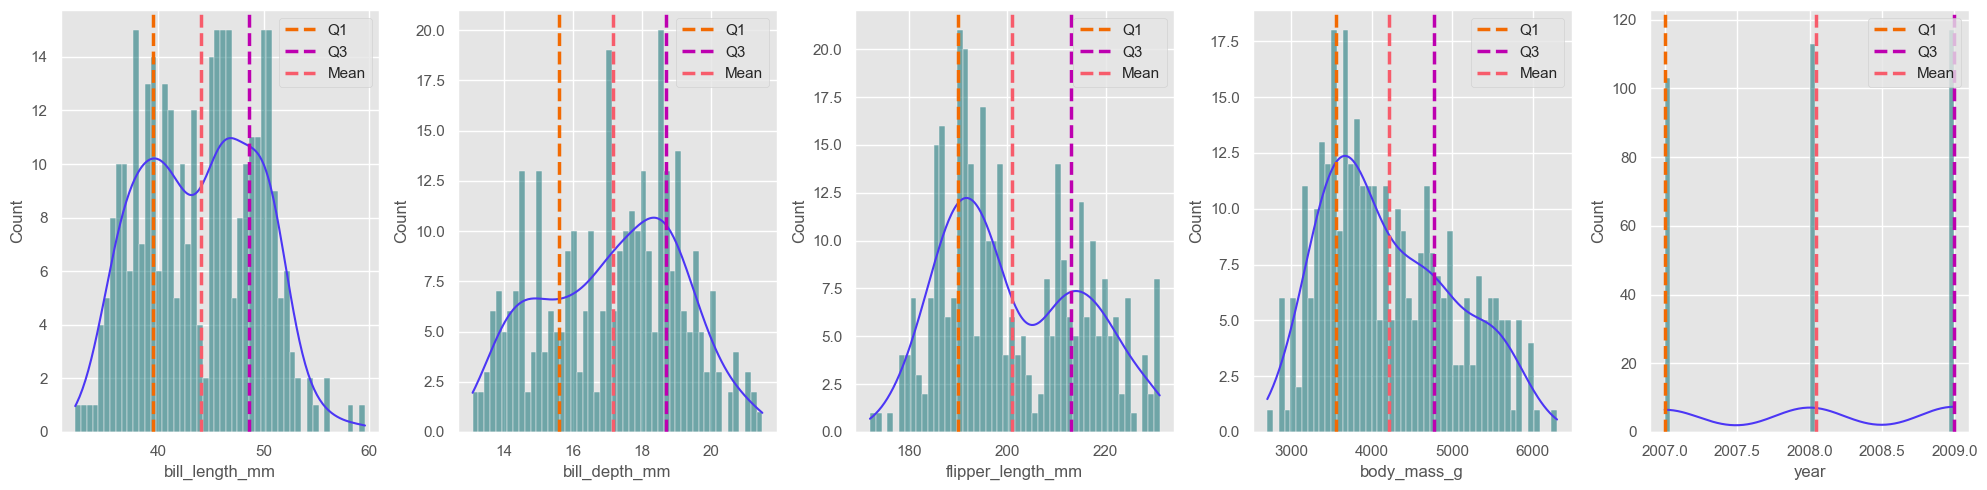

In [19]:
plot_histograms(datos_clean, numerical_statistics, penguin_color)
plt.tight_layout()
plt.show()

### Conclusiones parciales

De los gráficos, podemos concluir:

- Las variables `longitud_del_pico_mm`, `profundidad_del_pico_mm` y `longitud_de_aleta_mm` tienden a ser una distribución bimodal.

- En cuanto a la variable `masa_corporal_g`, tiende a ser una Distribución Sesgada Positivamente.


## Análisis categórico

Observa las estadísticas básicas de los datos categóricos.


In [20]:
datos_clean.describe(include="category")

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Visualización del conteo de variables categóricas


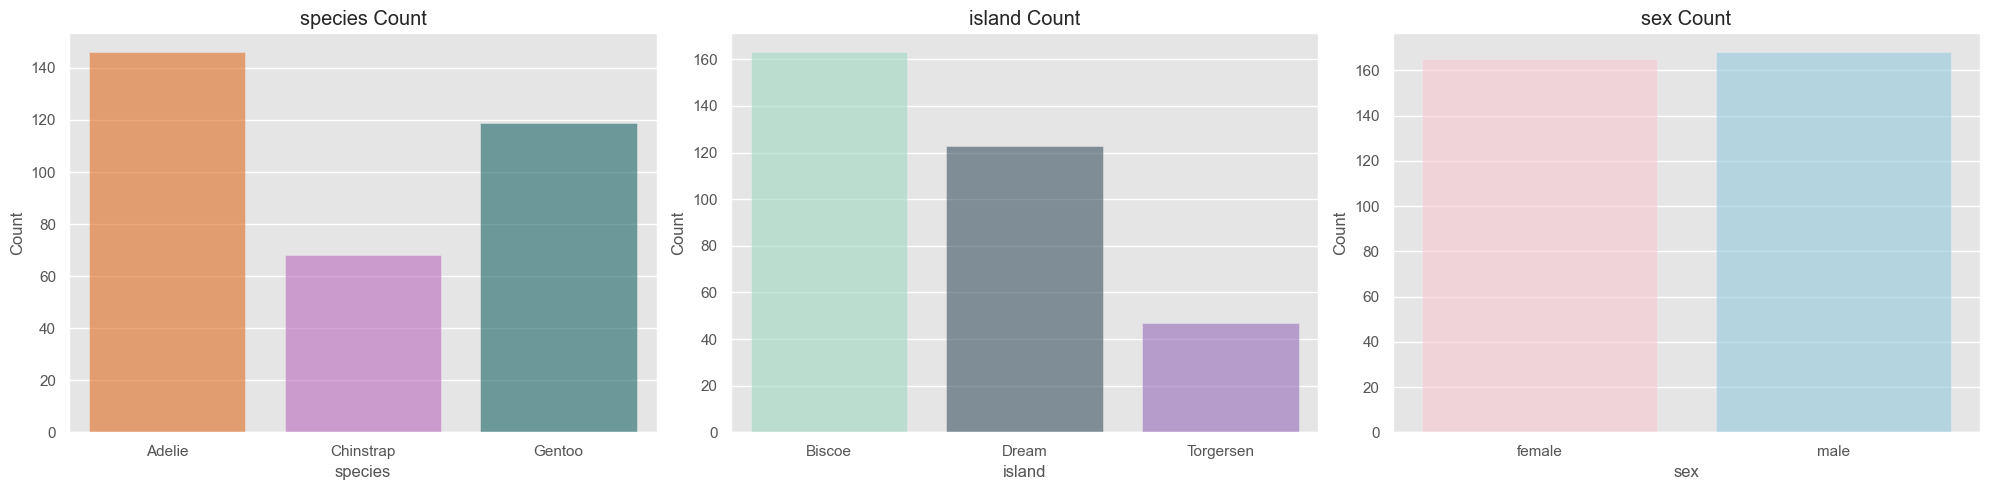

In [21]:
plot_category_count(datos_clean, category_columns, penguin_color)
plt.tight_layout()
plt.show()

| ESPECIE        | ISLA           | SEXO         |
| -------------- | -------------- | ------------ |
| Adelie _146_   | Biscoe _163_   | Male _168_   |
| Gento _119_    | Dream _123_    | Female _165_ |
| Chinstrap _68_ | Torgersen _47_ |              |


### Conclusiones parciales

En el gráfico anterior, se observa que los datos de la especie y las islas no están balanceados, excepto por el sexo de los pingüinos, que está balanceado.


### Visualización de la proporción de variables categóricas


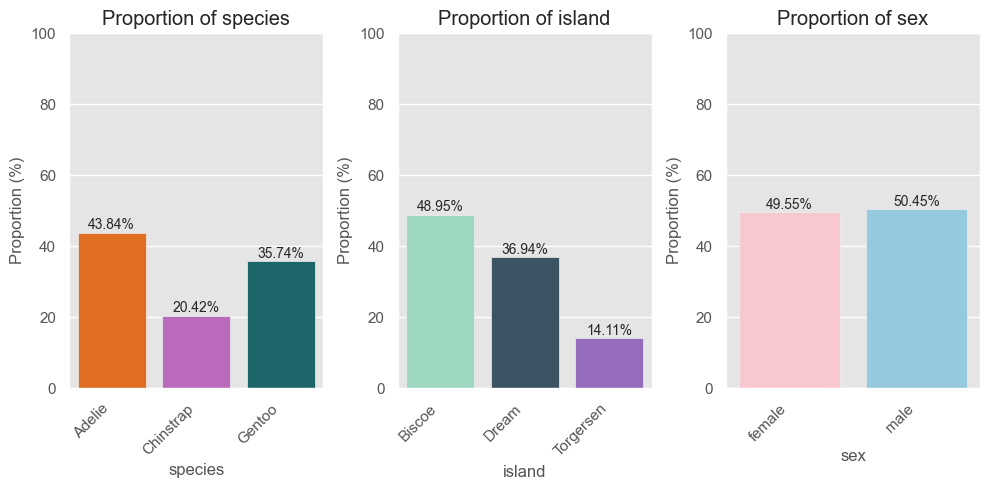

In [22]:
plot_category_proportions(datos_clean, category_columns, penguin_color)
plt.tight_layout()
plt.show()

| ESPECIE            | ISLA               | SEXO            |
| ------------------ | ------------------ | --------------- |
| Adelie _43.84%_    | Biscoe _48.95%_    | Male _50.45%_   |
| Gento _35.75%_     | Dream _36.94%_     | Female _49.55%_ |
| Chinstrap _20.42%_ | Torgersen _14.11%_ |                 |

La proporción de pingüinos entre las especies `Adelie` y `Gentoo` es similar, sin embargo, hay un menor número de `Chinstrap`.

La misma situación ocurre con las islas, donde tenemos la mayor concentración de pingüinos en la Isla `Biscoe`, seguida por `Dream` y `Torgersen` con menos registros.

### Conclusiones parciales

- La proporción de especies e islas es similar.

- Más del 40% de los pingüinos son de la especie Adelie.

- Cerca del 50% de los pingüinos habitan en la Isla Biscoe.


## Análisis bivariado

### Análisis numérico y categórico


Preparar filtros para el análisis de datos


In [23]:
male = datos_clean["sex"] == "Male"
female = ~male

adelie = datos_clean["species"] == "Adelie"
chinstrap = datos_clean["species"] == "Chinstrap"
gentoo = datos_clean["species"] == "Gentoo"

# Isla
torgersen = datos_clean["island"] == "Torgersen"
biscoe = datos_clean["island"] == "Biscoe"
dream = datos_clean["island"] == "Dream"

#
species = [adelie, chinstrap, gentoo]
islands = [torgersen, biscoe, dream]
sex = [male, female]

## Análisis de características de pingüinos

### Estadísticas de características de pingüinos


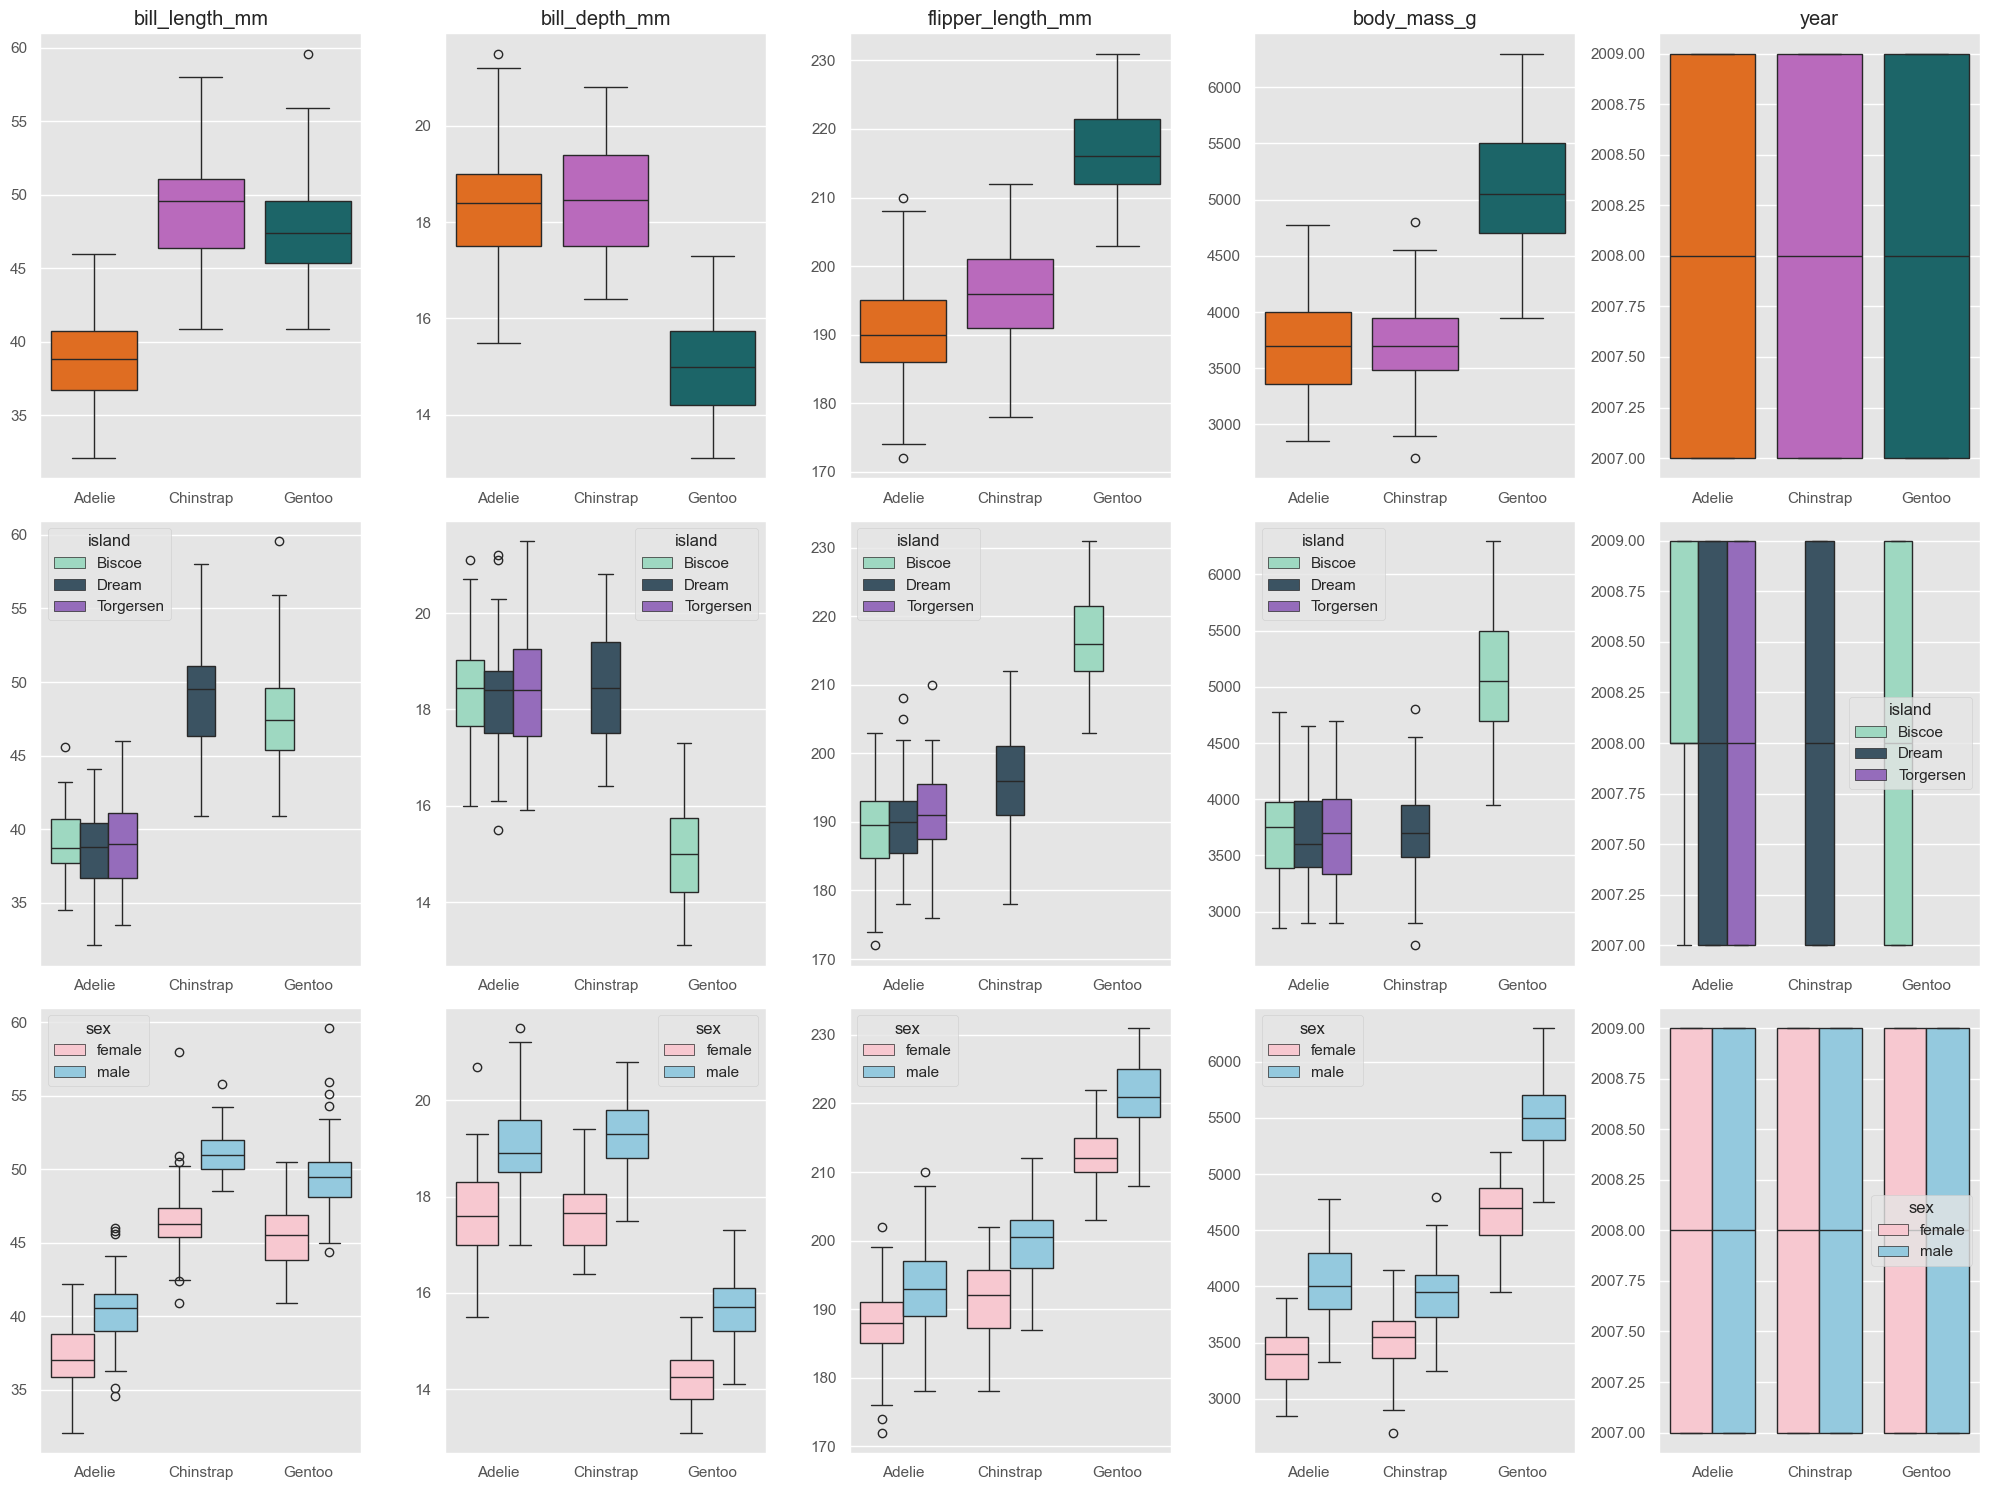

In [24]:
plot_categorical_vs_numeric(
    datos_clean, category_columns, numeric_columns, "box", penguin_color
)
plt.tight_layout()
plt.show()

### Conclusiones

**Pingüinos Adelie:**

1. Están presentes en las tres islas.

2. Los Adelie son más pequeños que las especies Barbijo y Papúa. Excepto en la profundidad de su pico.

3. Tanto su aleta como su pico, largos y anchos, son más largos en la Isla Torgersen que en su especie.

4. Tienden a ser más pesados ​​en la Isla Biscoe.

**Pingüinos Barbijo:**

1. Solo se encuentran en la Isla Dream.

2. Los pingüinos Barbijo tienen alas más largas y son más pesados ​​que los pingüinos Adelie pero menos que los pingüinos Papúa.

3. La longitud de su pico es similar a la del pingüino Adelie, pero es más ancha que la del pingüino Papúa.

**Pingüinos Papúa:**

1. Solo se encuentran en la Isla Biscoe.

2. Son más pesados ​​que las otras especies.

3. Tienen aletas más largas que las otras especies.

4. Los pingüinos Papúa tienen el pico más largo y más delgado al mismo tiempo.
   En todas las especies, los machos eran más grandes que las hembras. Pero se descubrió que una hembra de pingüino Barbijo tenía aletas más largas que otros machos de la misma especie.


## Análisis de la distribución de pingüinos

### Distribución general


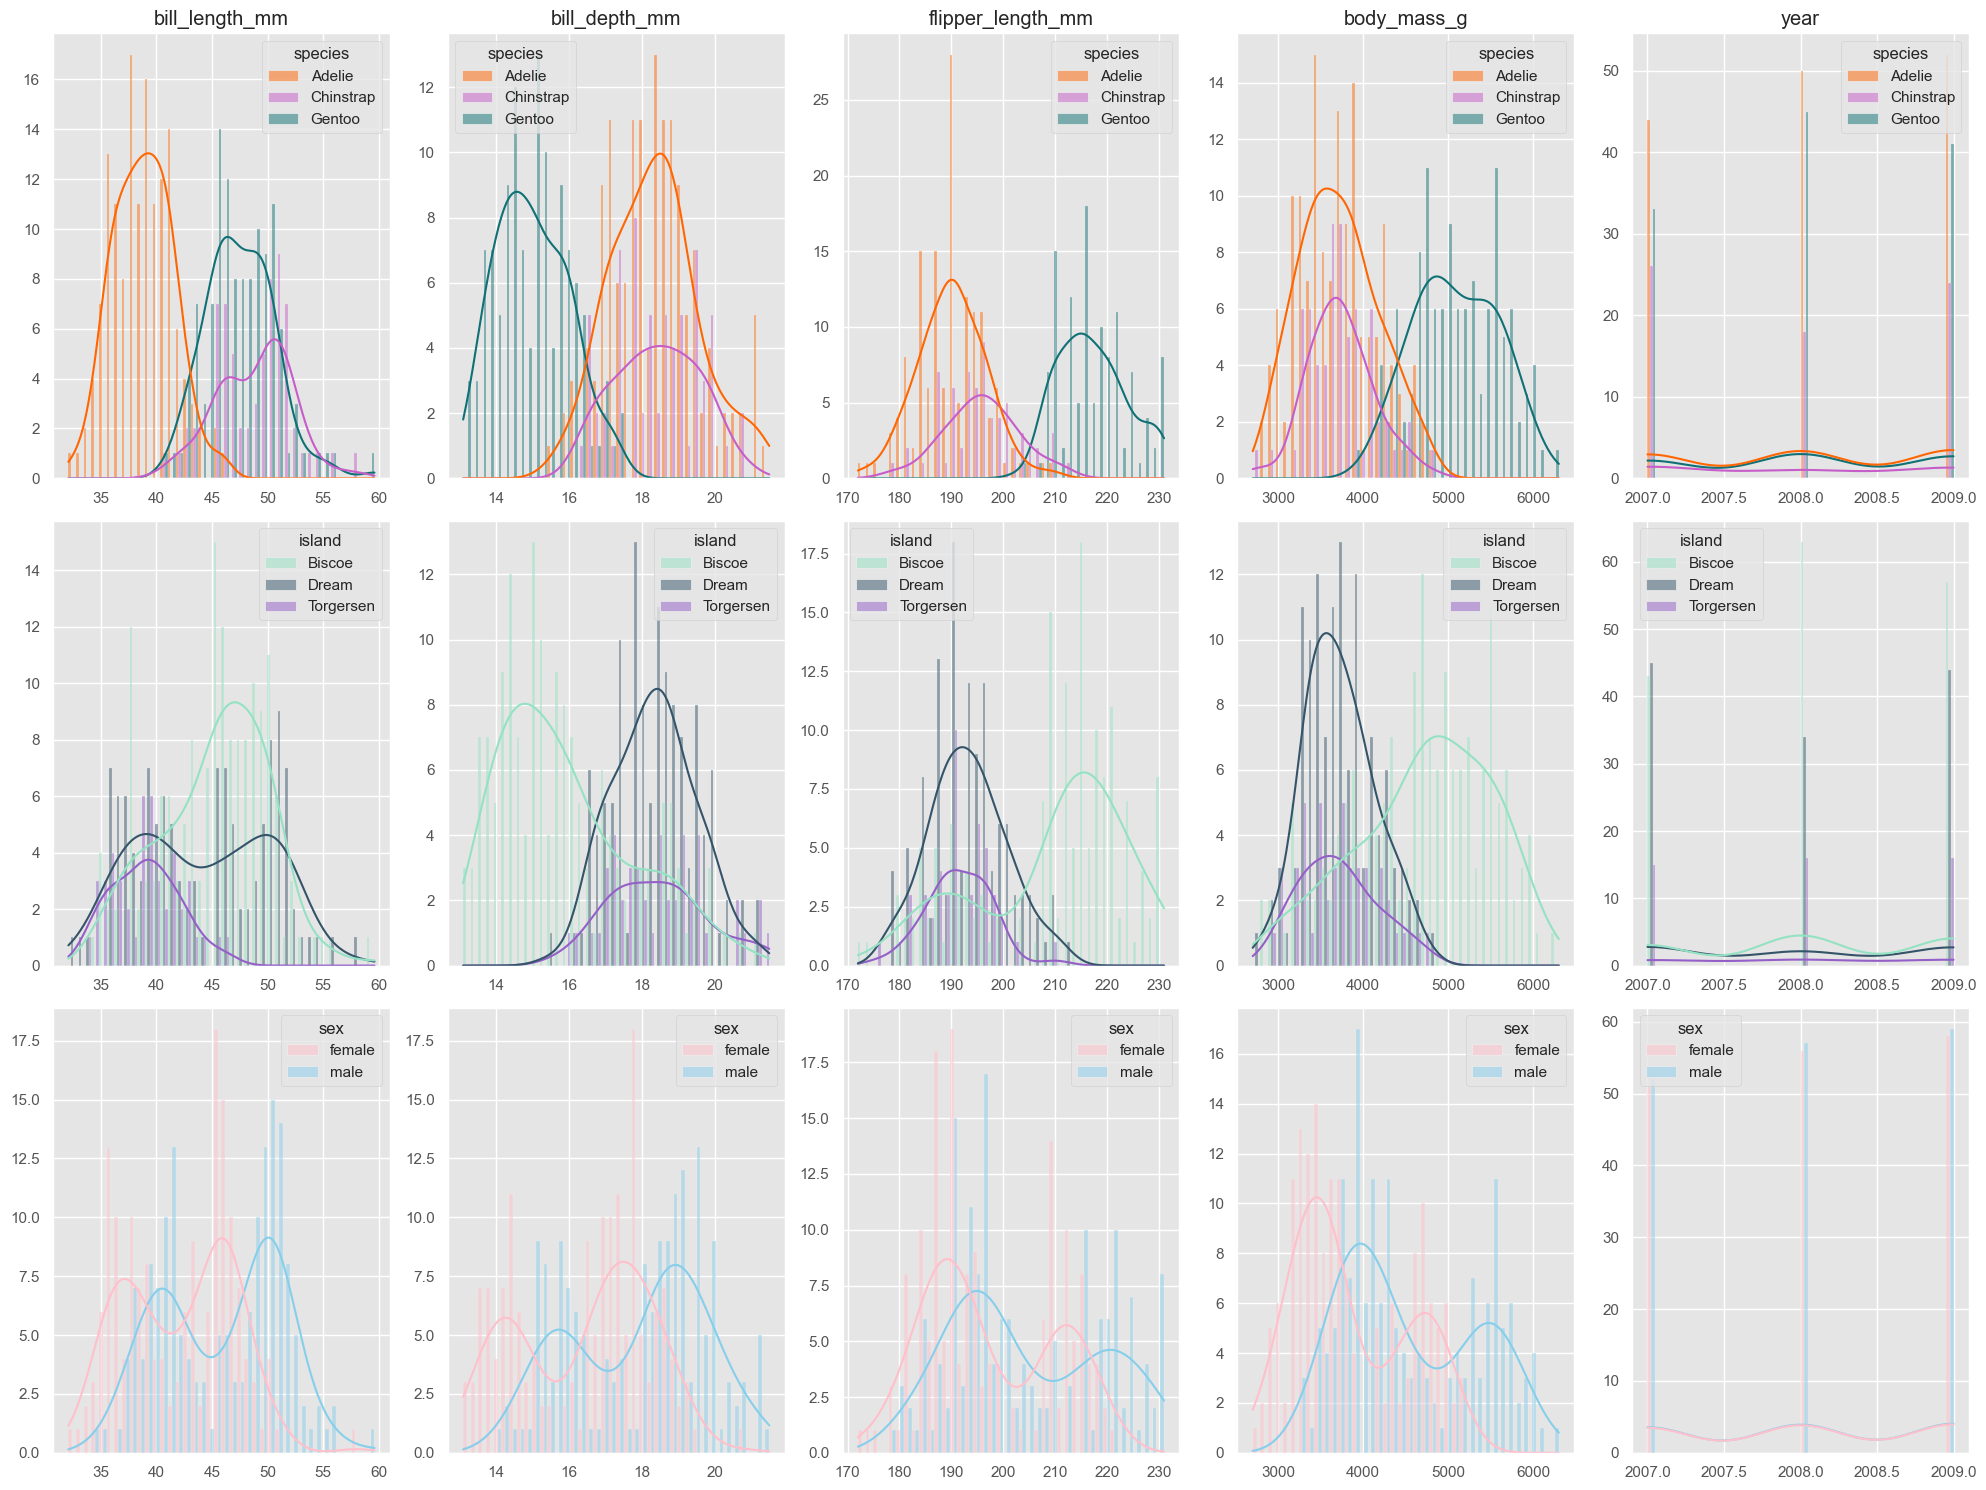

In [25]:
plot_distributions(datos_clean, category_columns, numeric_columns, penguin_color)
plt.tight_layout()
plt.show()

### Conclusiones parciales

**Con el último gráfico, podemos concluir que:**

1. La categoría de especies es la que más se asemeja a una distribución normal.

2. La Isla Biscoe tiene una tendencia bimodal.

3. La Isla Dream parece seguir una distribución normal excepto para la variable longitud del pico, que tiende a tener una distribución bimodal.

4. La Isla Torgersen tiende a tener una distribución normal.

5. El sexo de los pingüinos tiene una tendencia bimodal.

**Observaciones de los datos**

- Los sesgos en la categoría de especies pueden surgir de la diferencia en los valores entre sexos de la misma especie.

- Las tendencias bimodales en la categoría de isla pueden sugerir la presencia de más de un pingüino por isla.

- Las tendencias bimodales en el sexo se deben a diferentes especies.


### Distribución individual de especies


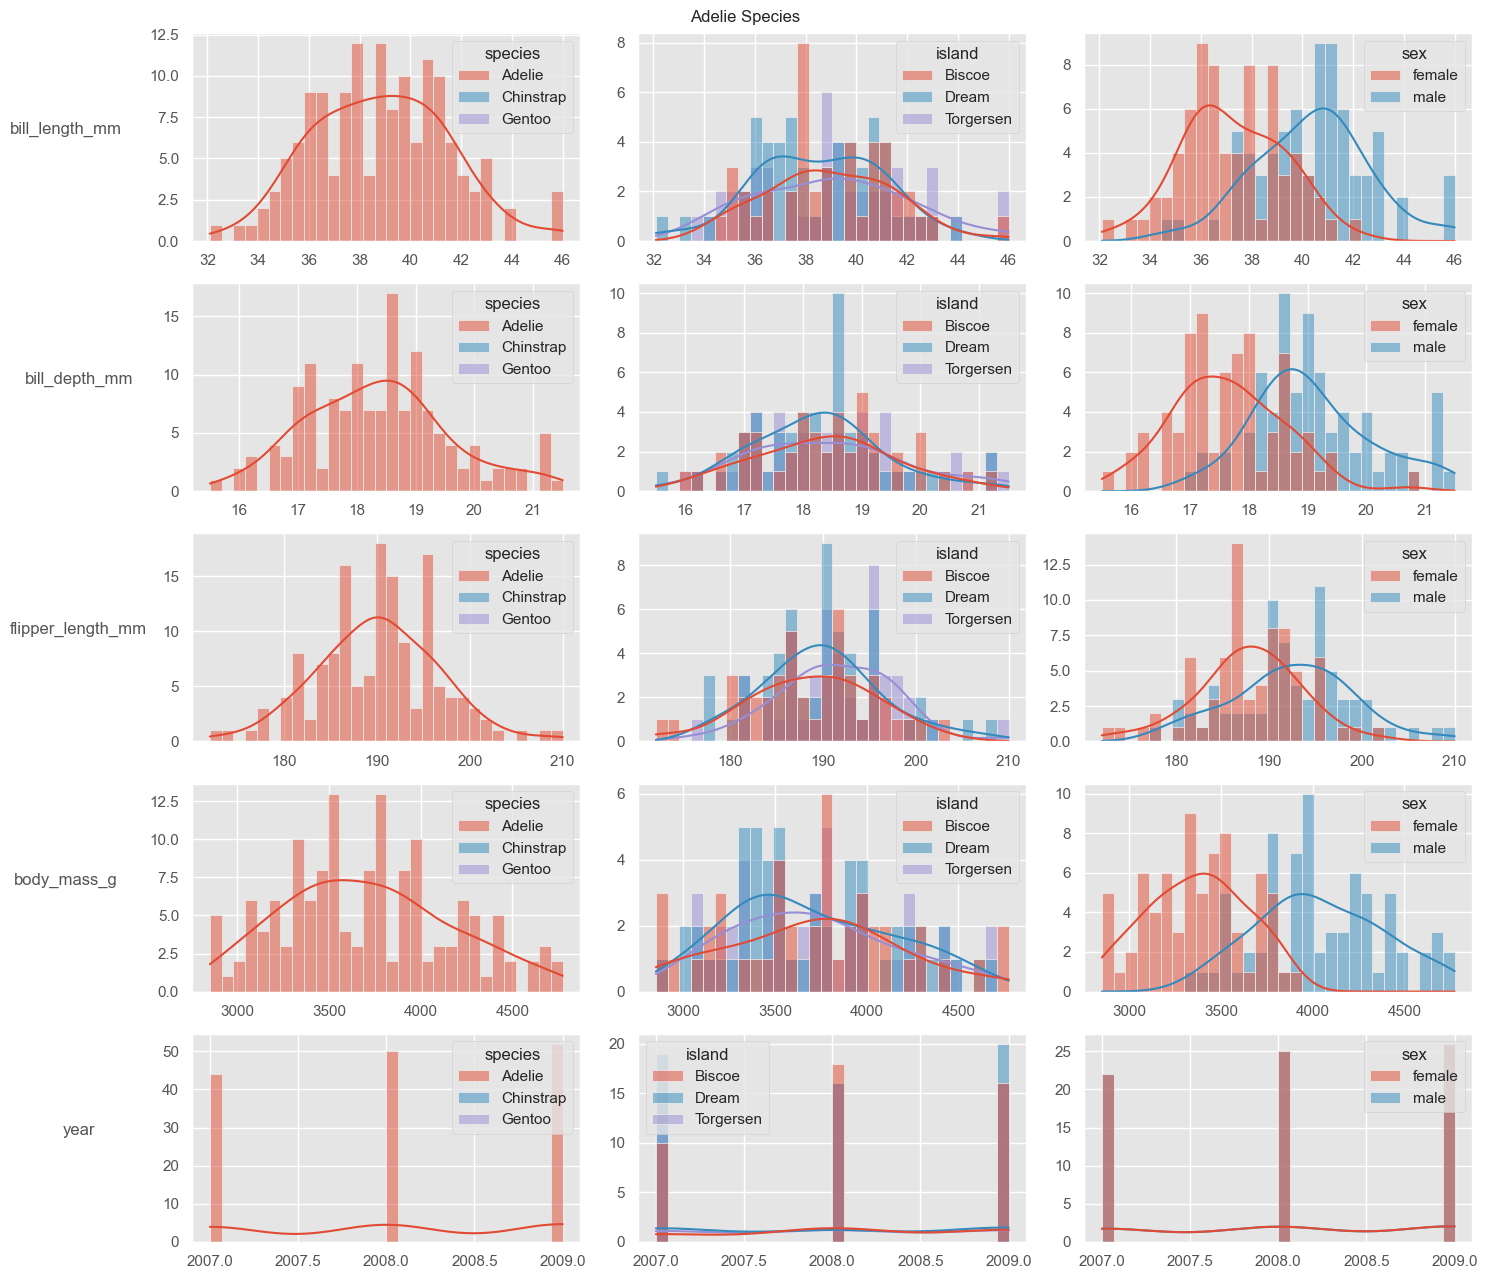

In [39]:
plot_distribution_specie(
    datos_clean, numeric_columns, category_columns, species="Adelie", bins=30
)
plt.tight_layout()
plt.show()

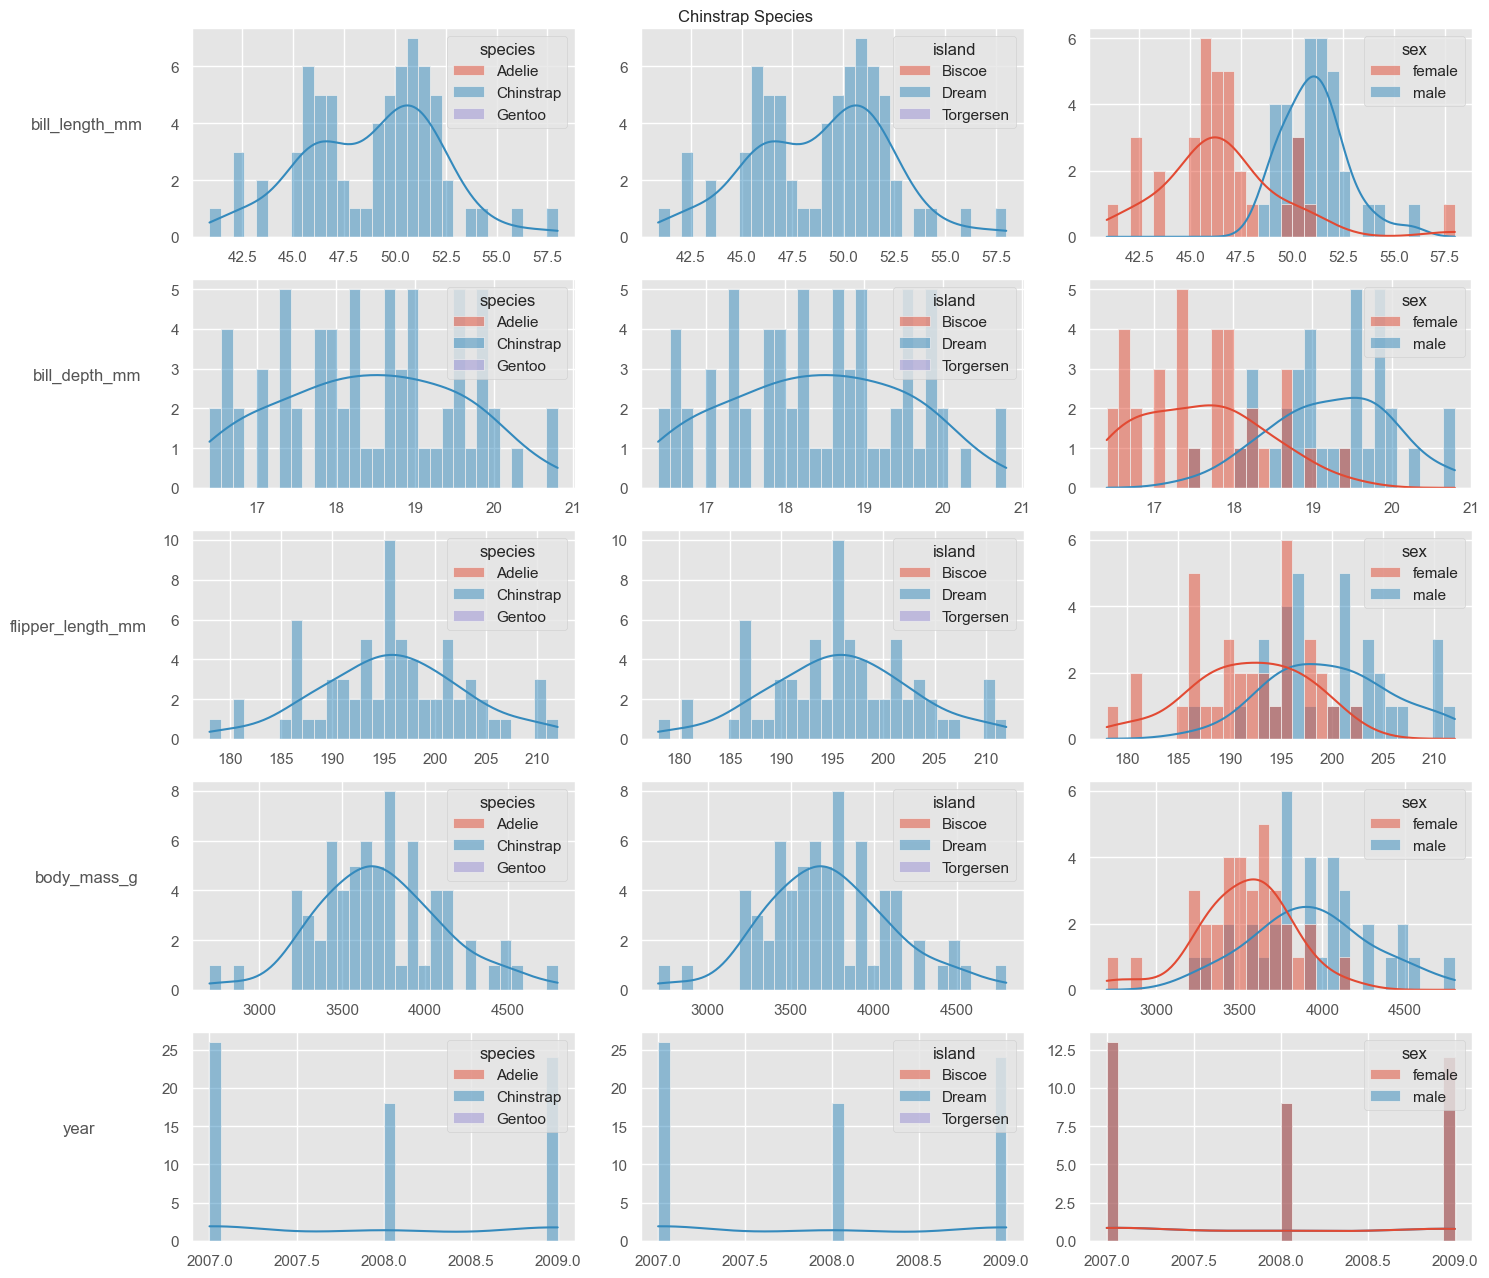

In [40]:
plot_distribution_specie(
    datos_clean, numeric_columns, category_columns, species="Chinstrap", bins=30
)
plt.tight_layout()
plt.show()

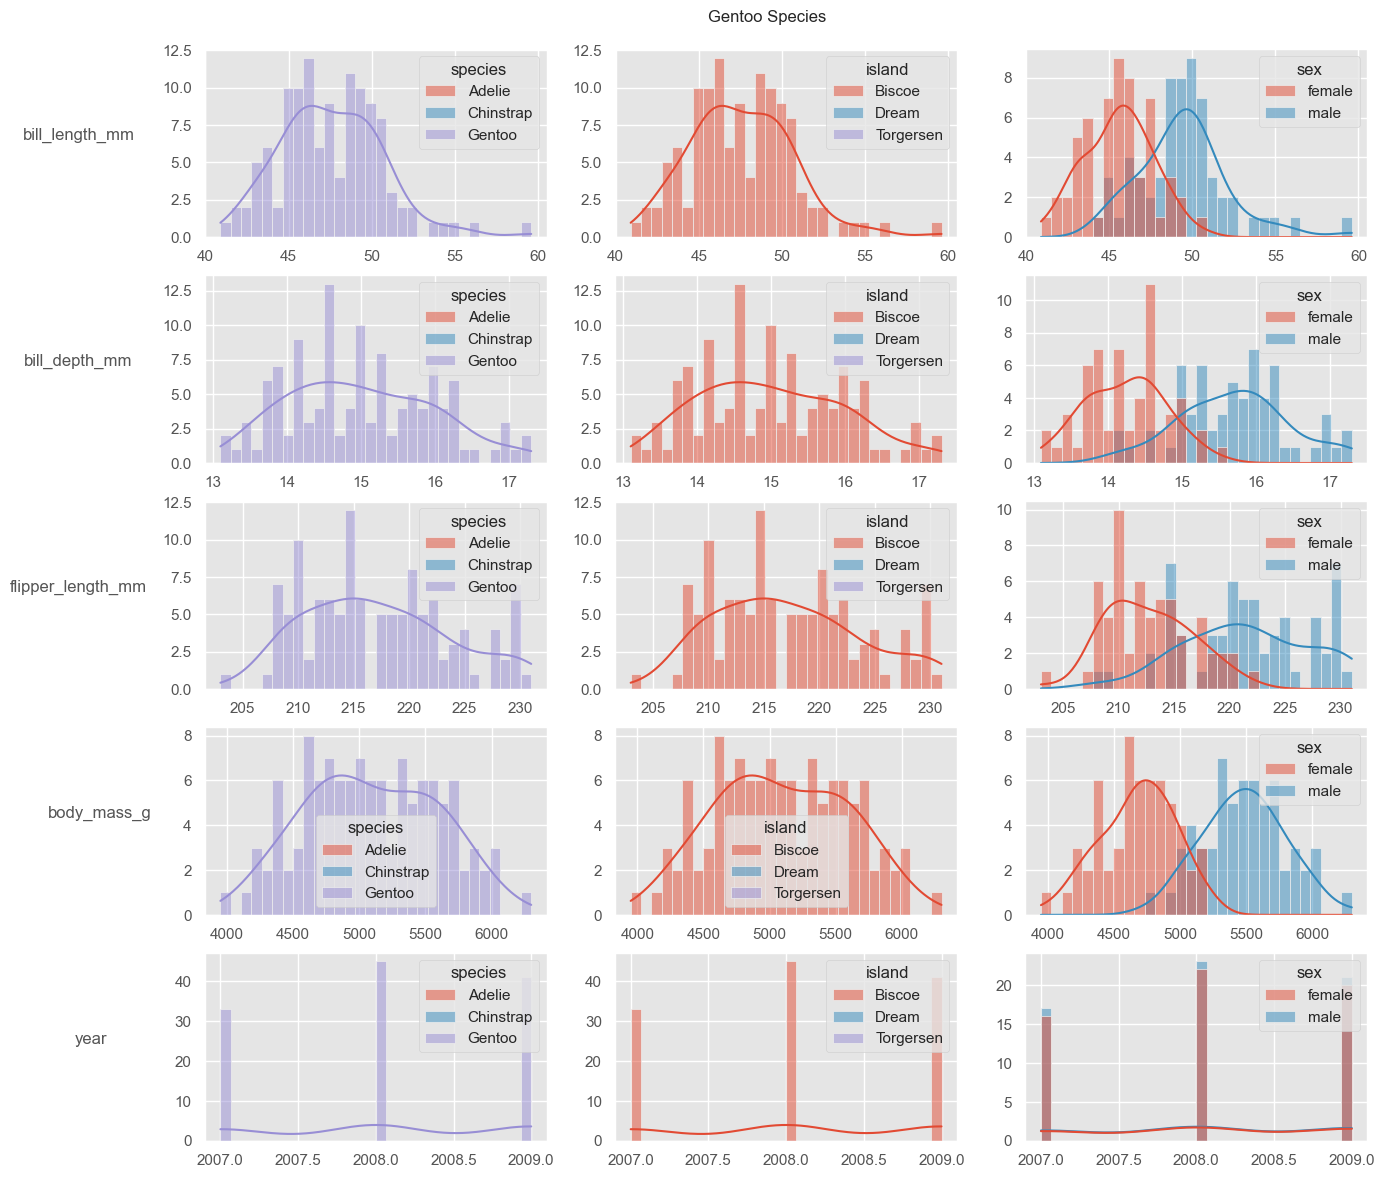

In [41]:
plot_distribution_specie(
    datos_clean, numeric_columns, category_columns, species="Gentoo", bins=30
)

### Conclusiones

Al analizar las características de los pingüinos por especie o isla, tienden a tener una distribución bimodal, pero al analizarlo por el sexo del pingüino, las variables numéricas analizadas encontraron principalmente una distribución normal para cada especie.


## Correlación entre variables

### Convirtiendo valores de texto a valores numéricos para el análisis de correlación


In [62]:
dummies = pd.get_dummies(datos_clean).iloc[:, 5:13]

In [64]:
dummies_df = pd.concat([datos_clean, dummies], axis=1)

In [65]:
dummies_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,True,False,False,False,False,True,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,True,False,False,False,False,True,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,True,False,False,False,False,True,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,True,False,False,False,False,True,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,False,True,False,False,True,False,False,True
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,False,True,False,False,True,False,True,False
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,False,True,False,False,True,False,False,True
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,False,True,False,False,True,False,False,True


### Correlation Matrix


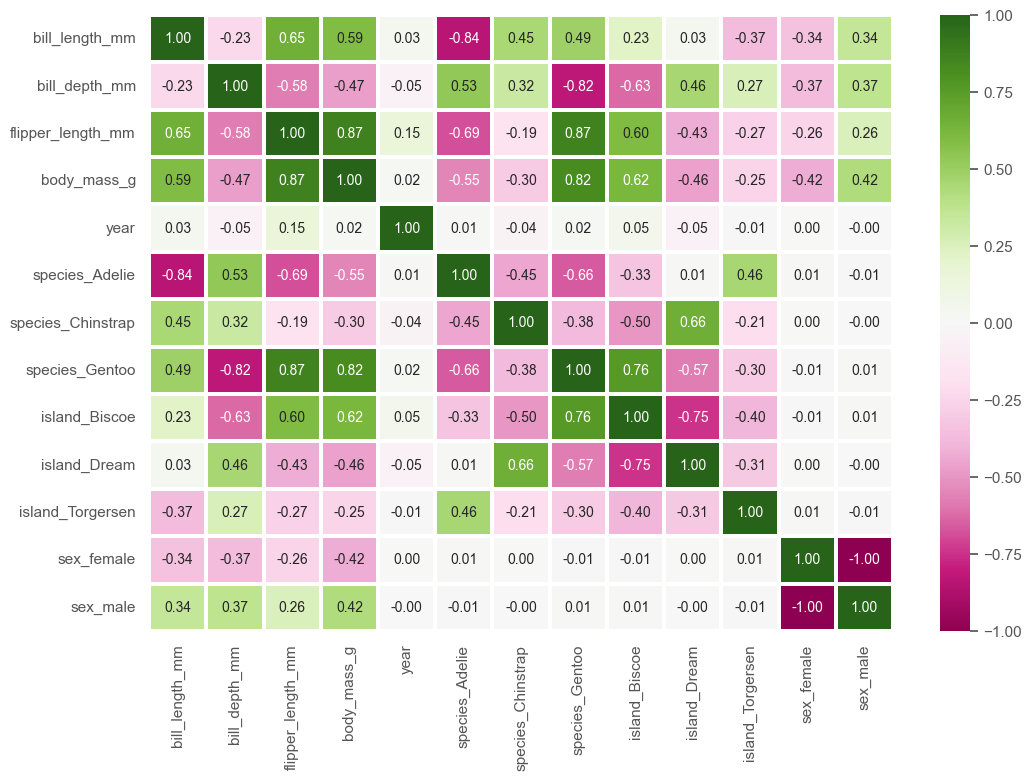

In [73]:
sns.heatmap(
    data=dummies_df.corr(numeric_only=True),
    annot=True,
    cmap="PiYG",
    fmt=".2f",
    linewidth=1.5,
)
plt.show()

### Interpretación del mapa de calor

#### CORRELACIÓN POSITIVA: Si un aumento en la característica A conduce a un aumento en la característica B, entonces están positivamente correlacionadas. Un valor de 1 significa correlación positiva perfecta.

#### CORRELACIÓN NEGATIVA: Si un aumento en la característica A conduce a una disminución en la característica B, entonces están negativamente correlacionadas. Un valor de -1 significa correlación negativa perfecta.

Del gráfico anterior, podemos observar que las especies de pingüinos están fuertemente correlacionadas con un incremento o decremento en sus características.

También se presentan algunas correlaciones interesantes por isla, con fuertes correlaciones positivas y negativas dependiendo de la especie o características de los pingüinos.

La variable sexo nos proporciona algunas correlaciones débiles tanto positivas como negativas que pueden ser útiles.
